# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [7]:
X_test = pd.read_csv("C:/Users/dimas/Desktop/EBAC - Cientista de Dados/Primeiros Modelos de ML/Aprendizagem Baysiana/X_test.csv", delimiter=',')
X_train = pd.read_csv("C:/Users/dimas/Desktop/EBAC - Cientista de Dados/Primeiros Modelos de ML/Aprendizagem Baysiana/X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("C:/Users/dimas/Desktop/EBAC - Cientista de Dados/Primeiros Modelos de ML/Aprendizagem Baysiana/y_test.csv", delimiter=',')
y_train = pd.read_csv("C:/Users/dimas/Desktop/EBAC - Cientista de Dados/Primeiros Modelos de ML/Aprendizagem Baysiana/y_train_balanced.csv", delimiter=',')

In [9]:
X_test.head()

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,0
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,0
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,2
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,0
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,1


In [10]:
X_train.head()

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,711,35.0,10,0.00,2,1.0,0.0,5331178.0,1,0
1,619,33.0,7,0.00,2,0.0,1.0,1011687.0,1,0
2,841,54.0,4,102721.49,1,1.0,1.0,1011687.0,1,1
3,679,48.0,6,125161.24,1,1.0,0.0,579659.0,1,0
4,656,42.0,6,0.00,3,0.0,0.0,14233155.0,0,0


In [11]:
y_test.head()

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [12]:
y_train.head()

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [15]:
# Verificando a distribuição das classes no conjunto de treino e teste
print(f"Distribuição das classes no conjunto de treino:{y_train.value_counts()}")
print(f"\nDistribuição das classes no conjunto de teste:{y_test.value_counts()}")

Distribuição das classes no conjunto de treino:Churn
0.0      58975
1.0      58975
Name: count, dtype: int64

Distribuição das classes no conjunto de teste:Churn
0.0      19649
1.0       5278
Name: count, dtype: int64


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [17]:
# Treinamento do modelo
naive_churn = GaussianNB(var_smoothing=1e-09)
naive_churn.fit(X_train, y_train.values.ravel())

GaussianNB()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

In [19]:
# Observando a acurácia do modelo e recall
y_pred_train = naive_churn.predict(X_train)
print(f"Acurácia do modelo nos dados de treinamento: {accuracy_score(y_train, y_pred_train)}")
print(f"\nRecall do modelo nos dados de treinamento: {recall_score(y_train, y_pred_train, average='macro')}")


Acurácia do modelo nos dados de treinamento: 0.5854938533276812

Recall do modelo nos dados de treinamento: 0.5854938533276812


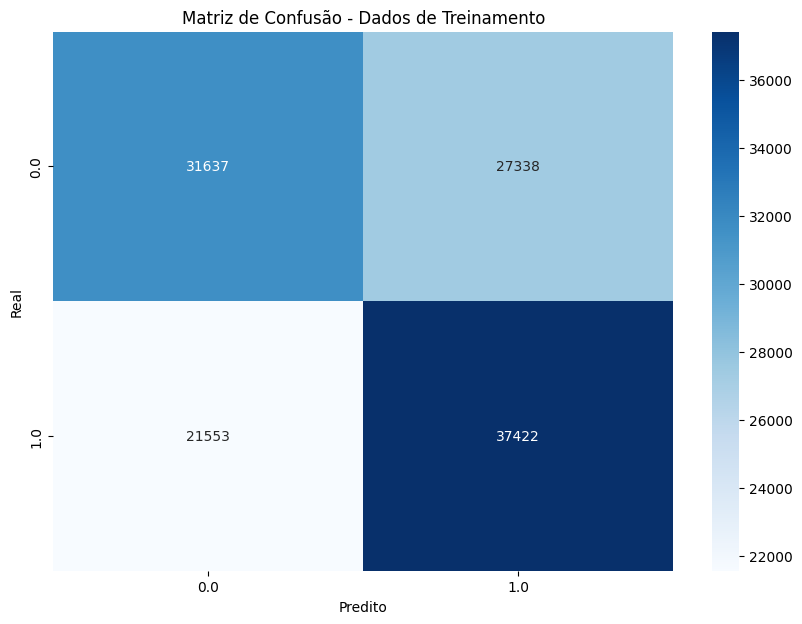

In [21]:
# Matriz de confusão para os dados de treinamento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=naive_churn.classes_, yticklabels=naive_churn.classes_)
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

##### Como é observável tanto no teste de acurácia, matriz de confusão e recall, o modelo parece estar quase sempre "chutando" se o cliente é churn ou não, atigindo uma precisão por volta dos 60%, fica claro que o modelo não se ajustou tão bem assim aos dados.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [20]:
# Observando a acurácia do modelo e recall
y_pred = naive_churn.predict(X_test)
print(f"Acurácia do modelo nos dados de treinamento: {accuracy_score(y_test, y_pred)}")
print(f"\nRecall do modelo nos dados de treinamento: {recall_score(y_test, y_pred, average='macro')}")

Acurácia do modelo nos dados de treinamento: 0.555261363180487

Recall do modelo nos dados de treinamento: 0.5891652479800337


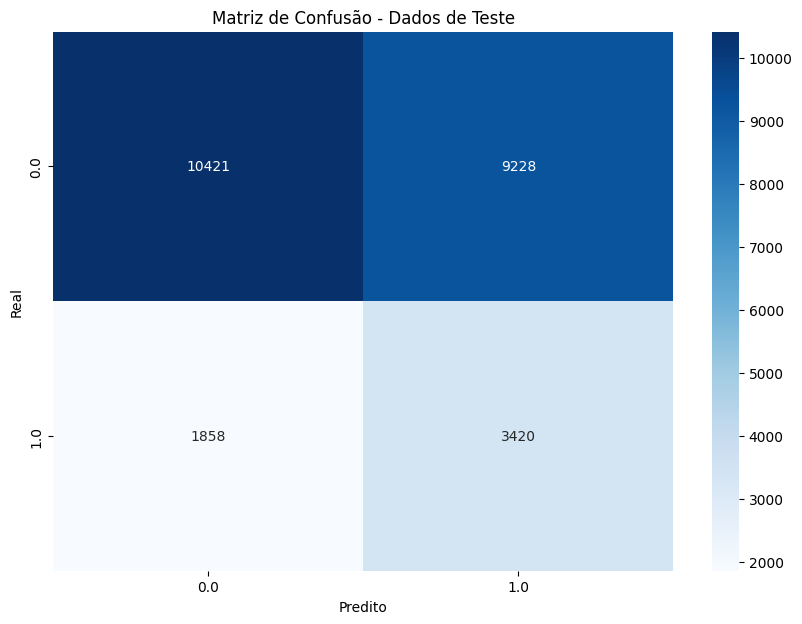

In [22]:
# Matriz de confusão para os dados de teste
cm_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=naive_churn.classes_, yticklabels=naive_churn.classes_)
plt.title('Matriz de Confusão - Dados de Teste')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

##### A tendência que observamos nos dados de treino continua, o modelo não se ajustou com precisão aos dados e sua acurácia e recall próximos de 50%, é possível afirmar que o modelo está praticamente adivinhando se o cliente é churn ou não. Isso mostra que ele ainda não está capturando padrões fortes na base de crédito, e pode estar reagindo mais a ruído do que a relações reais.

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

##### Nesse projeto, usamos o algoritmo Naive Bayes para analisar uma base de crédito e tentar prever se um cliente vai ou não se tornar inadimplente. A ideia foi treinar o modelo com dados reais e ver se ele consegue encontrar padrões que ajudem nessa previsão. O objetivo principal é ter uma ferramenta que possa apoiar decisões sobre concessão de crédito. No nosso caso, o modelo conseguiu identificar cerca de 60% dos casos de inadimplência, mas ainda está perto do que seria um chute, então precisa de ajustes para melhorar.